# HOMEWORK 3
Marta Oliva Riera

***

### QUESTION 1: COMPUTING TRANSITIONS IN A REPRESENTATIVE AGENT ECONOMY
Closed optimal growth economy with a large number of identical consumers, all maximizing their utility subject to the constraints. 

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import sympy as sy
import matplotlib.pyplot as plt

#### (a) Compute the steady state, choosing z to match a capital-output ratio of 4 and an investment-output ratio of 0.25
I analytically solved the maximization problem using a Lagrangean, took first order conditions and obtained some conditions  which I then wrote in steady state. I'm assuming that $\theta = 0.67$ and $h_t = 0.31$.

The Lagrangean is the following:

\begin{equation*}
{Max}_{c_t, k_{t+1}} L = E_{0}( \Sigma^{\infty}_{t=0} \beta^{t} ln c_t) + \lambda_t (k_t^{1-  \theta} (z h_t )^{\theta} + (1-\delta)k_t - k_{t+1} - c_t )
\end{equation*}

The corresponding FOCs:

$$ c_t: \beta^t \frac{1}{c_t} = \lambda_t $$ 
$$ k_{t+1}: \frac{\lambda_t}{\lambda_{t+1}} = (1 - \theta) (\frac{h_{t+1}z}{k_{t+1}})^{\theta} + 1 - \delta$$


From which I obtained the Euler equation ($\frac{1}{\beta}\frac{c_{t+1}}{c_t} = \frac{\lambda_t}{\lambda_{t+1}}$). Putting the Euler equation and the FOC with respect to capital together, and writing everything for the steady state (where $k_t = k_{t+1} = k$, and the same for the other variables), I obtain the following condition: 

\begin{equation*}
\frac{1}{\beta} = (1-\theta) (\frac{hz}{k})^{\theta} + 1 - \delta 
\end{equation*}

In addition to that, I normalize the value of $y=1$, such that from the ratios provided in the question we know that $k=4$ and $i=0.25$. Then, using the constraints to the consumers' problem in steady state I  can obtain values for the rest of variables: 


$$ i = k - k +\delta k $$
$$ \delta k = 0.25 $$
$$ \delta = 0.0625 $$

<br>

$$c = y - i  $$
$$c = 0.75$$

<br>

$$ y = k^{1-\theta} (zh)^{\theta} $$
$$ z = (\frac{y}{k^{1-\theta} h^{\theta}})^{1/\theta} $$
$$ z = 1.62 $$


Using these into the previously defined $\frac{1}{\beta}$ equation, I get the last of our parameters of interest in steady state: $\beta = 0.98$. 

To finish up, I wrote these conditions in python so I would obtain more precise values to use in the following questions: 

In [2]:
# (a) Steady state, where k/y=4 and i/y=0.25:
#------------------------------------------------------------------------------
# Assuming the following:
theta = 0.67
h = 0.31
y1 = 1       # this is a normalization

i1 = 0.25   # resulting from the normalization and the assumed ratios in the question
k1 = 4

# Conditions to obtain the rest of steady state values:
delta = i1/k1
c1 = y1- delta*k1
z1 = (y1/(k1**(1-theta)*h**theta))**(1/theta)
beta = 1/((1-theta)*((h*z1)/k1)**theta + 1 - delta)

SS1 = {'Variables': ['theta', 'beta', 'delta', 'c', 'i', 'h', 'y', 'z', 'k'], 'Steady State 1': [theta, beta, delta, c1, i1, h, y1, z1, k1]}
df1 = pd.DataFrame(SS1)
print(df1)


  Variables  Steady State 1
0     theta        0.670000
1      beta        0.980392
2     delta        0.062500
3         c        0.750000
4         i        0.250000
5         h        0.310000
6         y        1.000000
7         z        1.629676
8         k        4.000000


#### (b) Double z and compute the new steady state: 
Keeping the same parameter values ($\delta, \theta, \beta$) as well as the same labour ($h$), I doubled the value of $z$ and recomputed the rest of the variables' values in steady state, using the same equations and code as before. The results are presented underneath the code, compared to the previous ones: 

In [3]:
# (b) New steady state, double z: 
# -----------------------------------------------------------------------------
z2 = 2*z1
k2 = ((((h*z2)**(theta))/(((1/beta) - (1 - delta))/(1-theta))))**(1/theta)
i2 = delta*k2
y2 = k2**(1-theta) * (z2*h)**theta
c2 = y2 - delta*k2

SS12 = {'Variables': ['theta', 'beta', 'delta', 'c', 'i', 'h', 'y', 'z', 'k'], 'Steady State 1': [theta, beta, delta, c1, i1, h, y1, z1, k1], 'Steady State 2': [theta, beta, delta, c2, i2, h, y2, z2, k2]}
df12 = pd.DataFrame(SS12)
print(df12)

  Variables  Steady State 1  Steady State 2
0     theta        0.670000        0.670000
1      beta        0.980392        0.980392
2     delta        0.062500        0.062500
3         c        0.750000        1.500000
4         i        0.250000        0.500000
5         h        0.310000        0.310000
6         y        1.000000        2.000000
7         z        1.629676        3.259352
8         k        4.000000        8.000000


All variables have doubled their value in the new steady state, except for labour which is the one I kept the same by the initial assumption. 

#### (c) Transition between steady states: 
Starting at the steady state computed at 1, I introduce a shock at $t=0$ where z is doubled, and will plot the transition path from those values to those in the second steady state. Two main equations define the values which our variables will take in the transition: the budget constraint and the Euler equation with the FOCs which I previously derived, now not in steady state.

Budget constraint:
\begin{equation*}
k_{t+1} = k_t^{1-\theta} (z h_t)^{\theta} + (1 - \delta)k_t - c_t
\end{equation*}

Euler + FOC: 
\begin{equation*}
c_{t+1} = c_t \beta ((1-\theta) (\frac{h_t z}{k_{t+1}})^{\theta} + 1 - \delta)
\end{equation*}

These, along with the initial constraints ($y_t = k_t^{1-\theta} (z h_t)^{\theta}$ and $i_t = y_t - c_t$) will determine the transition paths. To calculate them, I set all the initial values of the variables to the those in the first steady state, except for consumption: consumption would immediately react to the increase in z and increase as well. As for this initial value of capital, I provide an educated initial guess (larger than 0.75, I tried several values). Then I create a loop which uses these equations and initial values to compute the transition paths, plotted below the code: 

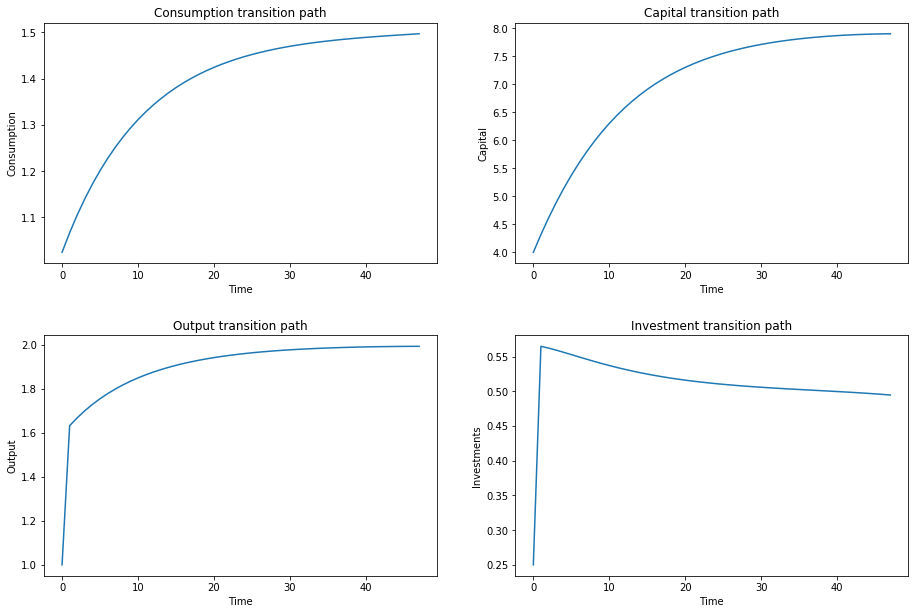

Last capital value in the time path: 7.901347042884349
Last consumption value in the time path: 1.4972437649268613
47


In [4]:
# (c) Transiton paths: 
# -----------------------------------------------------------------------------
c = 1.02443     # initial guess for c0, the immediate jump when the shock in z hits - for now updated manually by me,
                # but should add an iteration algorithm which did this itself
t = 0
ct = []         # setting up the different variables as arrays and determining their initial values
ct.append(c)
it = []
it.append(i1)
ht = []
ht.append(h)
yt = []
yt.append(y1)
kt = []
kt.append(k1)

# Loop creating the transition path for each of the variables of interest: 
while k2 - kt[t] > 0.1:
    kt.append(kt[t]**(1-theta)*(z2*h)**theta + (1-delta)*kt[t]- ct[t])
    ct.append(((1-theta)*(h*z2)**theta*kt[t+1]**(-theta) + (1 - delta))*ct[t]*beta)
    yt.append(kt[t+1]**(1-theta) * (z2*h)**theta)
    it.append(yt[t+1] - ct[t+1])
    t += 1

# Plotting these time paths: 
plt.figure()
plt.subplot(221)
plt.plot(ct)
plt.title('Consumption transition path')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.subplot(222)
plt.plot(kt)
plt.title('Capital transition path')
plt.ylabel('Capital')
plt.xlabel('Time')
plt.subplot(223)
plt.plot(yt)
plt.title('Output transition path')
plt.ylabel('Output')
plt.xlabel('Time')
plt.subplot(224)
plt.plot(it)
plt.title('Investment transition path')
plt.ylabel('Investments')
plt.xlabel('Time')
plt.subplots_adjust(top=2, bottom=0.08, left=0, right=2, hspace=0.3, wspace=0.2)
plt.show()

print('Last capital value in the time path: '+ str(kt[-1]))
print('Last consumption value in the time path: '+ str(ct[-1]))
print(t)

As can be seen in the plots, all variables almost converged to the new steady state after 47 periods, when the loop stopped. Both consumption and capital have smooth transition paths, but consumption converges faster. Output jumps in the period after the shock and after that it converges smoothly towards the new steady state value; while investment jumps to over 0.55 in the period after the shock, overshooting the new steady state of 0.5, and then converges down towards it.

#### (d) Unexpected shocks at t=10:
Now there is the same shock at t=0 where z is doubled, but it unexpectedly goes back down to its' initial value after 10 periods. I solve this doing the same as before, but adding an additional loop to account for the second shock. I also guess the initial value of the reaction to consumption after the second shock, and I manually iterated for some different values until I found the one which resulted in the best convergence. The results are plotted below:

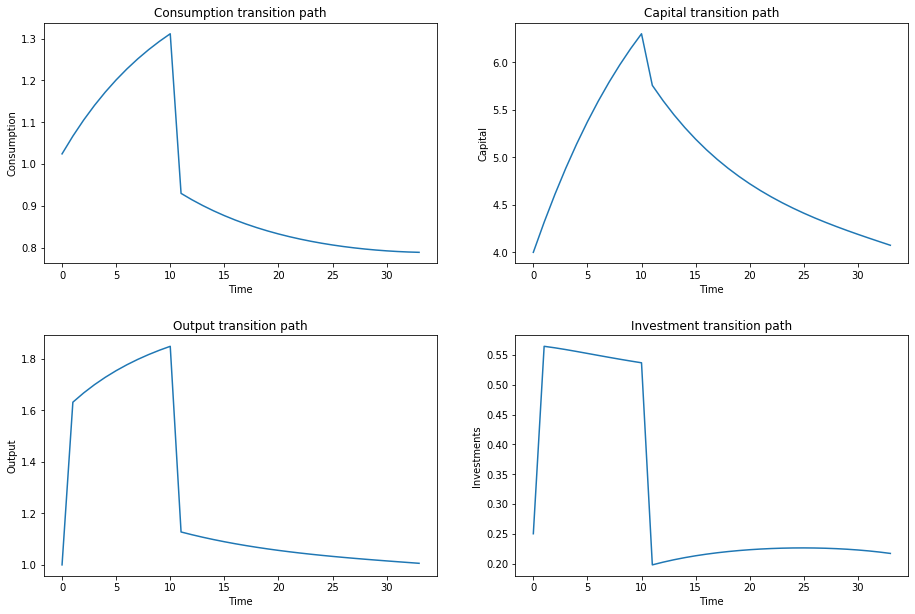

Last capital value in the time path: 4.07434108923767
Last consumption value in the time path: 0.789147944666145


In [5]:
# (d) Unexpected shocks: 
# -----------------------------------------------------------------------------
# Resetting the previously defined initial values:
c = 1.02443     #this is again manually chosen for the transition to converge
t = 0
ct = []
ct.append(c)
it = []
it.append(i1)
ht = []
ht.append(h)
yt = []
yt.append(y1)
kt = []
kt.append(k1)

# Loop of the transition now includes an unexpected shock at t=10: 
while (k2 - kt[t] > 0.1) and (t < 10):
    kt.append(kt[t]**(1-theta)*(z2*h)**theta + (1-delta)*kt[t]- ct[t])
    ct.append(((1-theta)*(h*z2)**theta*kt[t+1]**(-theta) + (1 - delta))*ct[t]*beta)
    yt.append(kt[t+1]**(1-theta) * (z2*h)**theta)
    it.append(yt[t+1] - ct[t+1])
    t += 1

while (kt[t] - k1 > 0.1) and (t >= 10):
    if t == 10: 
        ct.append(0.93)     # guessing again what the reaction at the shock is
        kt.append(kt[t]**(1-theta)*(z1*h)**theta + (1-delta)*kt[t]- ct[t])
        yt.append(kt[t+1]**(1-theta) * (z1*h)**theta)
        it.append(yt[t+1] - ct[t+1])
        t += 1
    else: 
        kt.append(kt[t]**(1-theta)*(z1*h)**theta + (1-delta)*kt[t]- ct[t])
        ct.append(((1-theta)*(h*z1)**theta*kt[t+1]**(-theta) + (1 - delta))*ct[t]*beta)
        yt.append(kt[t+1]**(1-theta) * (z1*h)**theta)
        it.append(yt[t+1] - ct[t+1])
        t += 1

# Plotting these new time paths: 
plt.figure()
plt.subplot(221)
plt.plot(ct)
plt.title('Consumption transition path')
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.subplot(222)
plt.plot(kt)
plt.title('Capital transition path')
plt.ylabel('Capital')
plt.xlabel('Time')
plt.subplot(223)
plt.plot(yt)
plt.title('Output transition path')
plt.ylabel('Output')
plt.xlabel('Time')
plt.subplot(224)
plt.plot(it)
plt.title('Investment transition path')
plt.ylabel('Investments')
plt.xlabel('Time')
plt.subplots_adjust(top=2, bottom=0.08, left=0, right=2, hspace=0.3, wspace=0.2)
plt.show()

print('Last capital value in the time path: '+ str(kt[-1]))
print('Last consumption value in the time path: '+ str(ct[-1]))


In this case, it is clear that all variables were following a path of convergence similar to the one in the previous question, but that is cut off in period t=10 when the unexpected shock hits. All variables react in that same period with a significant decrease, and then slowly adjust back to the initial steady state values.

***

### QUESTION 2: MULTICOUNTRY MODEL WITH FREE MOBILITY OF CAPITAL (NOT LABOUR) AND PROGRESSIVE LABOUR TAX
#### (2.1) Closed economy:
In order to compute the general equilibrium in the closed economy case, I wrote down the problems of the household and of the firm and took first order conditions. From those I obtained six equations which I use in the code below to solve for the six unknown variables (for each country): interest rate ($r_l$), wages ($w_l$), labour for high productivity and low productivity workers ($h_l^H$, $h_l^L$) and consumption for both types of productivity ($c_l^H$, $c_l^L$). 

This is the firms' problem and its corresponding FOCs, which provide the first two conditions: 

$${Max}_{K_l^d} z (K_l^d)^{1-\theta} (H_l^d)^{\theta} - w_l H_l^d - r_l K_l^d$$
<br>
$$K_l^d: r_l = z (1 - \theta) \frac{H_l^d}{K_l^d} $$
$$H_l^d: w_l =z \theta \frac{(K_l^d)^{1-\theta}}{(H_l^d)^{1-\theta}}$$

The household problem's FOCs will provide the remaining conditions. Note that in the closed economy we do not have to solve for capital because the households can only invest it in their own country, and will therefore use their whole endowment ($k_l^H + h_l^L = \bar{k_l} = 2$). Note that in order to solve this I have assumed that each type of agent holds half of the capital endowment. This is the household problem written as a Lagrangean: 

$${Max}_{c_l, h_l} L = \frac{c_l^{1- \sigma}}{1- \sigma} - \kappa \frac{h_l^{1 + 1/\nu}}{1 + 1/\nu} + \mu ( \lambda (w_l h_l \eta_l)^{1-\phi_l} + r_l k_l^{eta_l} - c_l)$$
<br>
$$ c_l: c_l^{-\sigma} = \mu $$
$$h_l: \kappa h_l^{1/\nu} = \mu \lambda (1 - \phi_l) (w_l h_l \eta_l)^{-\phi_l} w_l \eta_l $$
$$\mu: c_l = \lambda (w_l h_l \eta_l)^{1-\phi_l} + r_l k_l^{eta_l}$$


The budget constraint (FOC with respect to $\mu$) gives us the third and fourth conditions (one for those with high productivity and another for the low productivity) and putting together the other two FOCs together gives us the last two conditions (again, one for each productivity type). The last one is presented below, rearranged to isolate labour ($h_l$):

\begin{equation*}
h_l = (\frac{1}{\kappa} \lambda (1-\phi_l) c_l^{-\sigma} (w_l \eta_l)^{1-\phi_l})^{\frac{\nu_l}{1 + \nu_l \phi_l}}
\end{equation*}

I solve this system of equation using scipy's fsolve, and present the results for both countries below: 


In [6]:
## (2.1) Closed Economy: 
# -----------------------------------------------------------------------------
# Defining the parameter values:
kappa = 5.0
nu = 1.0
sigma = 0.8
etaAH = 5.5     # switched the H and L provided
etaAL = 0.5
etaBH = 3.5
etaBL = 2.5
Z = 1.0
theta = 0.6
kbar = 2.0
lambdaA = 0.95 
lambdaB = 0.84
phi = 0.2

kAH, kAL = 1.0, 1.0   # making an assumption on how the capital endowment of the countries is distributed
kBH, kBL = 1.0, 1.0   
Kd = kbar


'''Notation: 
    r = x0
    w = x1
    hL = x2
    hH = x3
    cL = x4
    cH = x5'''

# Solved for the equilibrium analytically and obtained 6 equations which we need to solve, which
# I put together into the following function to solve as a system of equations:
# Country A:
def f(x): 
    f1=(-x[0]+(1-theta)*Z*(x[2]*etaAL+x[3]*etaAH)**(theta)*Kd**(-theta))        # Firm's FOC wrt K
    f2=(-x[1]+(theta)*Z*Kd**(1-theta)*(x[2]*etaAL+x[3]*etaAH)**(theta-1))       # Firm's FOC wrt H
    f3=(-x[2]+((1-phi)*lambdaA*(1/kappa)*x[4]**(-1*sigma)*(x[1]*etaAL)**(1-phi))**(nu/(1+nu*phi)))      # HH's FOCs, productivity = L
    f4=(-x[3]+((1-phi)*lambdaA*(1/kappa)*x[5]**(-1*sigma)*(x[1]*etaAH)**(1-phi))**(nu/(1+nu*phi)))      # HH's FOCs, productivity = H
    f5=(-x[4]+lambdaA*(x[1]*x[2]*etaAL)**(1-phi)+x[0]*kAL**etaAL)               # Budget constraint, productivity = L
    f6=(-x[5]+lambdaA*(x[1]*x[3]*etaAH)**(1-phi)+x[0]*kAH**etaAH)               # Budget constraint, productivity = H
    return (f1, f2, f3, f4, f5, f6)
solA = fsolve(f,[1,1,1,1,1,1])
A = {'':['r', 'w', 'hL', 'hH', 'cL', 'cH'], }

# Country B: 
def g(x): 
    g1=(-x[0]+(1-theta)*Z*(x[2]*etaBL+x[3]*etaBH)**(theta)*Kd**(-theta))
    g2=(-x[1]+(theta)*Z*Kd**(1-theta)*(x[2]*etaBL+x[3]*etaBH)**(theta-1))                               
    g3=(-x[2]+((1-phi)*lambdaB*(1/kappa)*x[4]**(-1*sigma)*(x[1]*etaBL)**(1-phi))**(nu/(1+nu*phi)))
    g4=(-x[3]+((1-phi)*lambdaB*(1/kappa)*x[5]**(-1*sigma)*(x[1]*etaBH)**(1-phi))**(nu/(1+nu*phi)))      
    g5=(-x[4]+lambdaB*(x[1]*x[2]*etaBL)**(1-phi)+x[0]*kBL**etaBL)                                       
    g6=(-x[5]+lambdaB*(x[1]*x[3]*etaBH)**(1-phi)+x[0]*kBH**etaBH)                                       
    return (g1, g2, g3, g4, g5, g6)
solB = fsolve(g,[1,1,1,1,1,1])

ab = {'Variables':['r', 'w', 'hL', 'hH', 'cL', 'cH'], 'Country A':[solA[0], solA[1], solA[2], solA[3], solA[4], solA[5]], 'Country B':[solB[0], solB[1], solB[2], solB[3], solB[4], solB[5]]}
dfab = pd.DataFrame(ab)
print(dfab)

  Variables  Country A  Country B
0         r   0.403070   0.378446
1         w   0.596950   0.622571
2        hL   0.151024   0.287811
3        hH   0.354570   0.315457
4        cL   0.482665   0.820289
5        cH   1.475886   1.000798


Both countries have different wages and interest rates, which influence how much their households work and are able to consume. In both cases, as expected, the most productive agents work more and are able to consume notably more.

#### (2.2) Union economy:
Now I consider the case where there is a free market for capital, so that households can use decide how much capital to use in their country and how much in the other one. To do this, I have to solve for all the previous unknowns for both countries at the same, and now we also have to include capital for both types of agents in both countries. That results in 16 unknown variables, which require 16 equations in order to be solved. Just like in the previous question, I obtain them from the firm and the household's problems. Note that I'm still assuming the same egalitarian distribution of capital endowments. 
The firm's problem and its' FOCs are exactly the same, but now we obtain four equations from them. The Lagrangean for the household's problem is the following:

$${Max}_{c_l, h_l} L = \frac{c_l^{1- \sigma}}{1- \sigma} - \kappa \frac{h_l^{1 + 1/\nu}}{1 + 1/\nu} + \mu ( \lambda (w_l h_l \eta_l)^{1-\phi_l} + r_l k_l^{\eta_l} + r_{-l}(\bar{k} - k_l) - c_l)$$


And these are relevant equations obtained from the FOCs (each of these would be used four times - one for each type of household in each country): 

$$k_l = (\frac{1}{\eta_l} \frac{r_{-l}}{r_l})^{1-\eta} $$
$$h_l = (\frac{1}{\kappa} \lambda (1-\phi_l) c_l^{-\sigma} (w_l \eta_l)^{1-\phi_l})^{\frac{\nu_l}{1 + \nu_l \phi_l}} $$
$$c_l = \lambda (w_l h_l \eta_l)^{1-\phi_l} + r_l k_l^{\eta_l}  r_{-l}(\bar{k} - k_l) $$


Having all the necessary equations to solve the system, I proceed in the same way as in the last case:

In [7]:
## (2.2) Union Economy: 
# -----------------------------------------------------------------------------
# We now have 16 unkowns:
'''Notation:
    rA = x0
    rB = x1
    wA = x2
    wB = x3
    hAL = x4
    hAH = x5
    hBL = x6
    hBH = x7 
    cAL = x8
    cAH = x9
    cBL = x10
    cBH = x11
    kAL = x12
    kAH = x13
    kBL = x14
    kBH = x15'''

# Assumptions on the distribution of capital endowments:
kAH, kAL = 1.0, 1.0
kBH, kBL = 1.0, 1.0
Kd = kbar

# Having solved for the equilibrium conditions analytically, I have 16 conditions, which I write below in 
# a function equivalent to the one I wrote in the previous question, and solve it with the same procedure.
# The only difference is that now both countries are solved at the same time:
def h(x): 
    h1=-x[0]+(1-theta)*Z*(x[5]*etaAH+x[4]*etaAL)**(theta)*Kd**(-1*theta)    # Firm's FOCs
    h2=-x[1]+(1-theta)*Z*(x[6]*etaBH+x[7]*etaBL)**(theta)*Kd**(-1*theta)
    h3=-x[2]+(theta)*Z*Kd**(1-theta)*(x[5]*etaAH+x[4]*etaAL)**(theta-1)
    h4=-x[3]+(theta)*Z*Kd**(1-theta)*(x[6]*etaBH+x[7]*etaBL)**(theta-1)
    h5=-x[4]+((1-phi)*lambdaA*(1/kappa)*x[8]**(-1*sigma)*(x[2]*etaAL)**(1-phi))**(nu/(1+nu*phi))    # HH's FOC wrt h
    h6=-x[5]+((1-phi)*lambdaA*(1/kappa)*x[9]**(-1*sigma)*(x[2]*etaAH)**(1-phi))**(nu/(1+nu*phi))
    h7=-x[6]+((1-phi)*lambdaB*(1/kappa)*x[10]**(-1*sigma)*(x[3]*etaBL)**(1-phi))**(nu/(1+nu*phi))
    h8=-x[7]+((1-phi)*lambdaB*(1/kappa)*x[11]**(-1*sigma)*(x[3]*etaBH)**(1-phi))**(nu/(1+nu*phi))
    h9=-x[8]+lambdaA*(x[2]*x[4]*etaAL)**(1-phi)+x[0]*kAL**etaAL+x[1]*(Kd-kAL)       # Budget constraints
    h10=-x[9]+lambdaA*(x[2]*x[5]*etaAH)**(1-phi)+x[0]*kAH**etaAH+x[1]*(Kd-kAH)
    h11=-x[10]+lambdaB*(x[3]*x[6]*etaBL)**(1-phi)+x[1]*kBL**etaBL+x[0]*(Kd-kBL)
    h12=-x[11]+lambdaB*(x[3]*x[7]*etaBH)**(1-phi)+x[1]*kBH**etaBH+x[0]*(Kd-kBH)
    h13=-x[12]+(x[1]/(x[0]*etaAL))**(1/(etaAL-1))     # HH's FOC wrt k
    h14=-x[13]+(x[1]/(x[0]*etaAH))**(1/(etaAH-1))
    h15=-x[14]+(x[0]/(x[1]*etaBL))**(1/(etaBL-1))
    h16=-x[15]+(x[0]/(x[1]*etaBH))**(1/(etaBH-1))
    return(h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16)
solAB = fsolve(h, [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
AB = {'Union':['rA', 'rB', 'wA', 'wB', 'hAL', 'hAH', 'hBL', 'hBH', 'cAL', 'cAH', 'cBL', 'cBH', 'kAL', 'kAH', 'kBL', 'kBH'], 'Solutions':[solAB[0], solAB[1], solAB[2], solAB[3], solAB[4], solAB[5], solAB[6], solAB[7], solAB[8], solAB[9], solAB[10], solAB[11], solAB[12], solAB[13], solAB[14], solAB[15]]}
dfAB = pd.DataFrame(AB)
print(dfAB)

   Union  Solutions
0     rA   0.380484
1     rB   0.341936
2     wA   0.620345
3     wB   0.666134
4    hAL   0.111849
5    hAH   0.324383
6    hBL   0.243188
7    hBH   0.275514
8    cAL   0.786973
9    cAH   1.752727
10   cBL   1.130021
11   cBH   1.311939
12   kAL   0.309545
13   kAH   0.668599
14   kBL   0.582954
15   kBH   0.632309


In the results we can observe how the interest rates are not exactly the same, which should actually be the case as otherwise there are arbitrage opportunities. Wages are also not very different across countries, despite different levels of labour income taxation. As in the closed economy case, in both countries the most productive agents are working more hours as well as consuming more. All agents except those with low productivity in country A use most of their capital in their own country, even if the interest rate is slightly larger in country A.

The union has resulted in lower interest rates, higher wages, lower labour hours and larger consumption when compared to the closed economy situation. 

#### (2.3) Optimal taxation of labour income:
In order to choose the optimal progressive taxation of labour income we need to write and solve the social planner's problem. Then we would have to choose the degree of progressivity of taxation ($\phi_l$) which actually maximized the social welfare function of the planner. 

The social planner's problem:

$$ Max \Sigma_l ( \Omega_l \frac{c_l^{1- \sigma}}{1- \sigma} - \kappa \frac{h_l^{1 + 1/\nu}}{1 + 1/\nu}) $$
<br>
$$ s.t. G_l = w_l h_l^H \eta_l^H - \lambda (w_l h_l^H \eta_l^H)^{1-\phi_l} + w_l h_l^L \eta_l^L - \lambda (w_l h_l^L \eta_l^L)^{1-\phi_l}$$


In addition to the government's budget constraint, it should also be subject to the euler equations, budget constraints and FOCs of the firm, as written in the previous questions. To solve this I would use the same process as in the other questions, writting the system of equations as a function in python and using fsolve. 


